 ## Homework 1: Decision Trees and Evaluation


103120 - Beatriz Mira Mendes

100296 - Catarina Lemos

### 1) Loading data

In [4]:
import pandas as pd
from scipy.io.arff import loadarff 

# Reading thhe ARFF file and converting to Pandas DataFrame
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
X = df.drop('class', axis=1)
y = df['class']

### 2) Exercise

1)

In [17]:
### from sklearn.feature_selection import f_classif

fimportance = f_classif(X, y)

print('features', X.columns.values, '\n')
print('scores', fimportance[0], '\n')
print('pvalues', fimportance[1], '\n')

features ['pelvic_incidence' 'pelvic_tilt' 'lumbar_lordosis_angle' 'sacral_slope'
 'pelvic_radius' 'degree_spondylolisthesis'] 

scores [ 98.53970917  21.29919433 114.98284047  89.6439533   16.86693476
 119.12288061] 

pvalues [8.75284896e-34 2.17687915e-09 5.35732939e-38 2.17567036e-31
 1.12199590e-07 5.11473208e-39] 



2)

Let us for instance check the discriminative power of each feature in accordance with <em>f_classif</em> criterion

In [13]:
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

train_accs, test_accs = [], []
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=0)

# 2. learn classifier
for m in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    predictor = tree.DecisionTreeClassifier(max_depth=m)
    predictor.fit(X_train, y_train)     
   
    train_accs.append(round(metrics.accuracy_score(y_train, predictor.predict(X_train)), 2))
    test_accs.append(round(metrics.accuracy_score(y_test, predictor.predict(X_test)), 2))
    

# 3. plot classifier
print("Train accuracies:", train_accs,"\nTest accuracies:", test_accs)

Train accuracies: [0.78, 0.84, 0.85, 0.9, 0.93, 0.97, 0.98, 1.0, 1.0, 1.0] 
Test accuracies: [0.75, 0.78, 0.78, 0.85, 0.85, 0.82, 0.86, 0.83, 0.81, 0.84]


3)

As the maximum depth of the tree increases, so does te accuracy. This is applicable to all settings (?? i thinkies)

4)

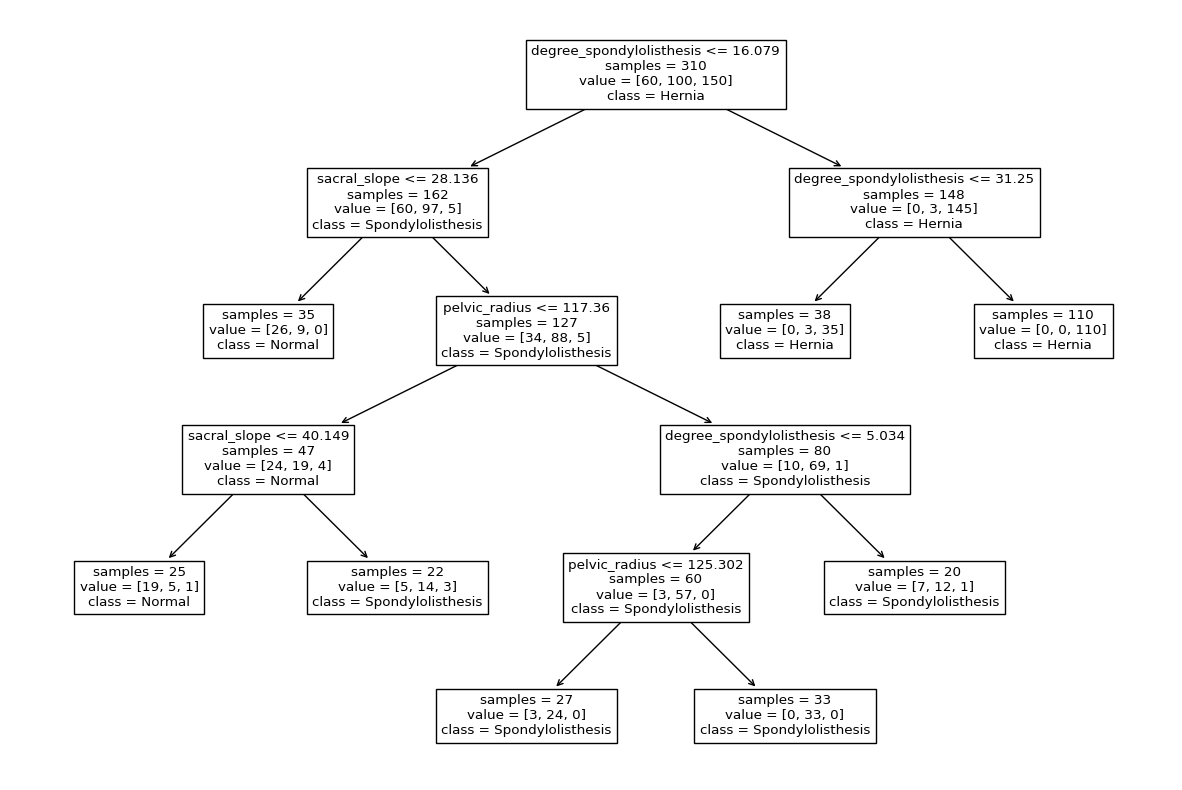

In [35]:
import matplotlib.pyplot as plt

feature_names = X.columns.tolist()

predictor = tree.DecisionTreeClassifier(min_samples_leaf=20)
predictor.fit(X, y)

figure = plt.figure(figsize=(15, 10))
tree.plot_tree(predictor, feature_names=feature_names, class_names=['Normal','Spondylolisthesis','Hernia'], impurity=False)
plt.show()

ii)